# Project: Dataset Augmentation Using GANs
## Section 1: Getting Started

### Task 1: Import the Libraries

In [3]:
import time
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from matplotlib import rcParams
from IPython.display import display
%matplotlib inline


### Task 2: Create the Data
#### Create dataset

In [4]:
# Generate random input data X with shape (1000, 2)
X = torch.normal(mean=0, std=1, size=(1000, 2))

# Define transformation matrix A (2x2)
A = torch.tensor([[1.0, -0.5],
                 [0.5, 2.0]])

# Define bias vector b (2x1) 
b = torch.tensor([[2.0],
                 [1.0]])

# Generate output data Y using Y = XA + b
# Reshape b to broadcast correctly (1000, 2)
data = torch.matmul(X, A) + b.T


#### Display dataset

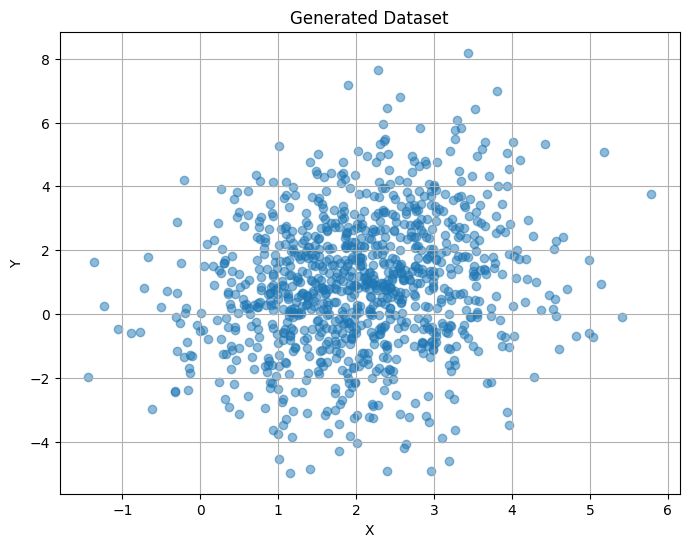

In [5]:
# Create a scatter plot of the dataset
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5)
plt.title('Generated Dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


#### Creating Dataset Iterateables

In [6]:
# Create TensorDataset from our data
dataset = torch.utils.data.TensorDataset(data)

# Create DataLoader
batch_size = 32
dataloader = torch.utils.data.DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=True
)


## Section 2: The Model
### Task 3: Generators and Discriminators

#### Generator Neural Net

In [ ]:
# Define the Generator network
class Generator(nn.Module):
    def __init__(self, input_dim=100, output_dim=2):
        super(Generator, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim)
        )
        
    def forward(self, x):
        return self.model(x)


#### Discriminator Neural Net

In [ ]:
# Define the Discriminator network
class Discriminator(nn.Module):
    def __init__(self, input_dim=2):
        super(Discriminator, self).__init__()
        
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Tanh()
        )
    
    def forward(self, x):
        return self.model(x)


### Task 4: Discriminator Updates

In [7]:
def discriminator_update(X, Z, nnet_D, nnet_G, loss, trainer_D):
    # Reset gradients
    trainer_D.zero_grad()
    
    # Get batch size
    batch_size = X.size(0)
    
    # Create labels for real and fake data
    real_labels = torch.ones(batch_size, 1)
    fake_labels = torch.zeros(batch_size, 1)
    
    # Forward pass with real data
    real_output = nnet_D(X)
    loss_real = loss(real_output, real_labels)
    
    # Generate fake data
    fake_data = nnet_G(Z)
    
    # Forward pass with fake data
    fake_output = nnet_D(fake_data.detach())  # Detach to avoid computing gradients for generator
    loss_fake = loss(fake_output, fake_labels)
    
    # Compute total discriminator loss
    loss_D = (loss_real + loss_fake) / 2
    
    # Compute gradients
    loss_D.backward()
    
    # Update weights
    trainer_D.step()
    
    return loss_D


### Task 5: Generator Updates

In [8]:
def generator_update(Z, nnet_D, nnet_G, loss, trainer_G):
    # Reset gradients
    trainer_G.zero_grad()
    
    # Get batch size
    batch_size = Z.size(0)
    
    # Create labels (we want generator to fool discriminator)
    real_labels = torch.ones(batch_size, 1)
    
    # Generate fake data
    fake_data = nnet_G(Z)
    
    # Get discriminator predictions on fake data
    fake_output = nnet_D(fake_data)
    
    # Compute generator loss
    loss_G = loss(fake_output, real_labels)
    
    # Compute gradients
    loss_G.backward()
    
    # Update weights
    trainer_G.step()
    
    return loss_G


## Section 3: The Train Function
### Task 6: Initialize the Parameters

### Task 7: Compute the Losses

### Task 8: Display Generated Distributions

### Task 9: Display the losses

### Task 10: Create the Training Function

#### Train the Model

# End